Pe 0.2555583950932788
Pe 0.22862368541380887
Pe 0.18601190476190477
Pe 0.14452955629426217
Pe 0.10182262498727217
Pe 0.06883733737179046
Pe 0.040062497496093905
Pe 0.02209017208244052
Pe 0.00952961805290844
Pe 0.003427838850439963
Pe 0.00099625
Pe 0.000155
Pe 1.625e-05
Pe 1.25e-06


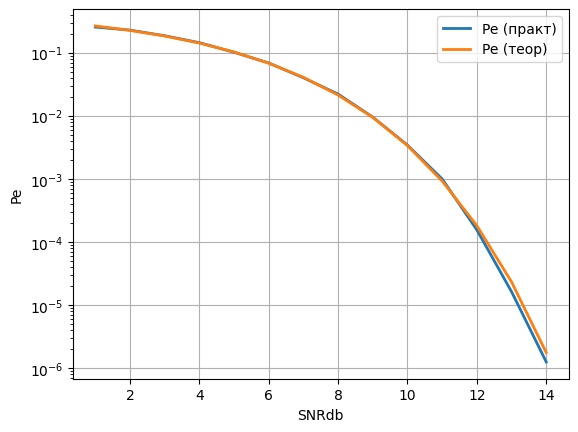

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

np.random.seed(0)

q, T, f0 = 2, 1e-6, 40e6
dtf = 1 / T
Ns = 50
A = 1
dt = 1 / (Ns * f0)
t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :])**2
max_value = 0
index_max = 0
Nerrmax = 1000
num_tests = 800000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

e = 1
m = np.sqrt(e / 2)
sigm = np.sqrt((1 - e) / 2)

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr = 0
    Ntest = 0
    Pe_t = 0
    for j in range(1, q):
        Pe_t += comb(q-1, j) \
            * ((-1) ** (j + 1)) \
            * (1/(1+j+j*(1-e)*E/N0)) \
            * np.exp(-(j*e*E/N0)/(1+j+j*(1-e)*E/N0))

    last_test = Ntest

    # while Nerr < Nerrmax:
    while Nerr < Nerrmax and Ntest < num_tests:
        i = np.random.randint(0, q)
        x = np.random.normal(m, sigm)
        y = np.random.normal(m, sigm)
        m_ = np.sqrt(x**2 + y**2)

        r = m_ * A * \
            np.cos(2 * np.pi * f[i] * t + 2 * np.pi * np.random.rand()) \
            + sigma * np.random.randn(len(t))

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.dot(r, f1[j, :])
            rsi[j] = np.dot(r, f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)

        if index_max != i:
            Nerr += 1
            # print(f"{index_max} != {i}")
            # print(f"SNRdb = {SNRdb[ns]} | {Nerr} Nerr | {Ntest} Ntest")

        Ntest += 1

        if Ntest - last_test > num_tests:
            # print(f"> {num_tests} tests")
            # print("Pe ~= 0")
            break

    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t
    print(f"Pe {Pe[ns]}")

plt.semilogy(SNRdb, Pe, label='Pe (практ)', linewidth=2)
plt.semilogy(SNRdb, Pe_teor, label='Pe (теор)', linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend()
plt.grid(True)
plt.show()

Pe 0.2988643156007173
Pe 0.26441036488630354
Pe 0.2446183953033268
Pe 0.21092596498628982
Pe 0.1802776275464215
Pe 0.15379883112888343
Pe 0.12347203358439314
Pe 0.10696331158412664
Pe 0.08955758552749418
Pe 0.07168458781362007
Pe 0.05421229534858506
Pe 0.046298439742580674
Pe 0.03431708991077557
Pe 0.029049500348594003


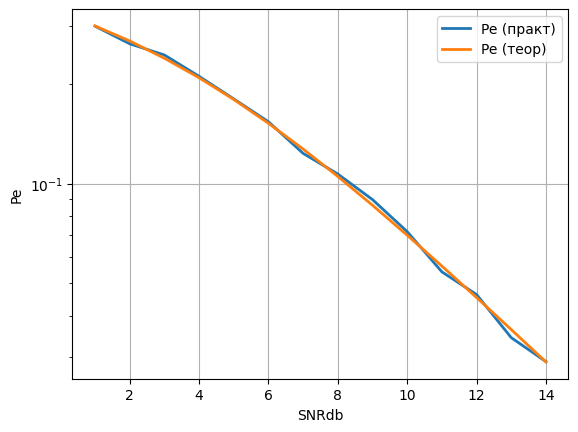

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

np.random.seed(0)

q, T, f0 = 2, 1e-6, 40e6
dtf = 1 / T
Ns = 50
A = 1
dt = 1 / (Ns * f0)
t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :])**2
max_value = 0
index_max = 0
Nerrmax = 1000
num_tests = 500000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

e = 0.5
m = np.sqrt(e / 2)
sigm = np.sqrt((1 - e) / 2)

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr = 0
    Ntest = 0
    Pe_t = 0
    for j in range(1, q):
        Pe_t += comb(q-1, j) \
            * ((-1) ** (j + 1)) \
            * (1/(1+j+j*(1-e)*E/N0)) \
            * np.exp(-(j*e*E/N0)/(1+j+j*(1-e)*E/N0))

    last_test = Ntest

    while Nerr < Nerrmax and Ntest < num_tests:
        i = np.random.randint(0, q)
        x = np.random.normal(m, sigm)
        y = np.random.normal(m, sigm)
        m_ = np.sqrt(x**2 + y**2)

        r = m_ * A * \
            np.cos(2 * np.pi * f[i] * t + 2 * np.pi * np.random.rand()) \
            + sigma * np.random.randn(len(t))

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.dot(r, f1[j, :])
            rsi[j] = np.dot(r, f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)

        if index_max != i:
            Nerr += 1
            # print(f"{index_max} != {i}")
            # print(f"SNRdb = {SNRdb[ns]} | {Nerr} Nerr | {Ntest} Ntest")

        Ntest += 1

        if Ntest - last_test > num_tests:
            # print(f"> {num_tests} tests")
            # print("Pe ~= 0")
            break

    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t
    print(f"Pe {Pe[ns]}")

plt.semilogy(SNRdb, Pe, label='Pe (практ)', linewidth=2)
plt.semilogy(SNRdb, Pe_teor, label='Pe (теор)', linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend()
plt.grid(True)
plt.show()

Pe 0.29455081001472755
Pe 0.2846569883290635
Pe 0.25412960609911056
Pe 0.22168033695411218
Pe 0.19857029388403494
Pe 0.16012810248198558
Pe 0.14064697609001406
Pe 0.11571395510298542
Pe 0.09831874938550782
Pe 0.08024394158241052
Pe 0.06754474839581223
Pe 0.05755064456721915
Pe 0.04754433509247373
Pe 0.038082181347347574


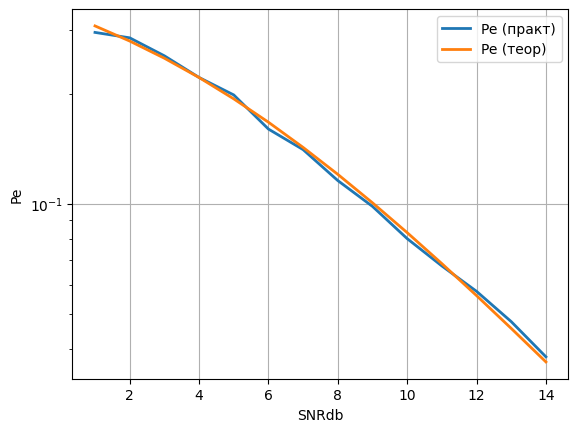

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

np.random.seed(0)

q, T, f0 = 2, 1e-6, 40e6
dtf = 1 / T
Ns = 50
A = 1
dt = 1 / (Ns * f0)
t = np.arange(0, T, dt)
f = np.zeros(q)
s = np.zeros((q, len(t)))
f1 = np.zeros((q, len(t)))
f2 = np.zeros((q, len(t)))

for i in range(q):
    f[i] = f0 + (i - 1) * dtf
    s[i, :] = A * np.cos(2 * np.pi * f[i] * t)
    f1[i, :] = np.sqrt(2 / T) * np.cos(2 * np.pi * f[i] * t)
    f2[i, :] = np.sqrt(2 / T) * np.sin(2 * np.pi * f[i] * t)

E = np.linalg.norm(s[0, :])**2
max_value = 0
index_max = 0
Nerrmax = 1000
num_tests = 500000
SNRdb = np.arange(1, 15)
Pe = np.zeros(len(SNRdb))
Pe_teor = np.zeros(len(SNRdb))

e = 0
m = np.sqrt(e / 2)
sigm = np.sqrt((1 - e) / 2)

for ns in range(len(SNRdb)):
    SNR = 10**(SNRdb[ns] / 10)
    N0 = E / SNR
    sigma = np.sqrt(N0 / 2)
    Nerr = 0
    Ntest = 0
    Pe_t = 0
    for j in range(1, q):
        Pe_t += comb(q-1, j) \
            * ((-1) ** (j + 1)) \
            * (1/(1+j+j*(1-e)*E/N0)) \
            * np.exp(-(j*e*E/N0)/(1+j+j*(1-e)*E/N0))

    last_test = Ntest

    # while Nerr < Nerrmax:
    while Nerr < Nerrmax and Ntest < num_tests:
        i = np.random.randint(0, q)
        x = np.random.normal(m, sigm)
        y = np.random.normal(m, sigm)
        m_ = np.sqrt(x**2 + y**2)

        r = m_ * A * \
            np.cos(2 * np.pi * f[i] * t + 2 * np.pi * np.random.rand()) \
            + sigma * np.random.randn(len(t))

        rci = np.zeros(q)
        rsi = np.zeros(q)
        ni = np.zeros(q)

        for j in range(q):
            rci[j] = np.dot(r, f1[j, :])
            rsi[j] = np.dot(r, f2[j, :])
            ni[j] = (rci[j]**2) + (rsi[j]**2)

        max_value = np.max(ni)
        index_max = np.argmax(ni)

        if index_max != i:
            Nerr += 1
            # print(f"{index_max} != {i}")
            # print(f"SNRdb = {SNRdb[ns]} | {Nerr} Nerr | {Ntest} Ntest")

        Ntest += 1

        if Ntest - last_test > num_tests:
            # print(f"> {num_tests} tests")
            # print("Pe ~= 0")
            break

    Pe[ns] = Nerr / Ntest
    Pe_teor[ns] = Pe_t
    print(f"Pe {Pe[ns]}")

plt.semilogy(SNRdb, Pe, label='Pe (практ)', linewidth=2)
plt.semilogy(SNRdb, Pe_teor, label='Pe (теор)', linewidth=2)
plt.xlabel('SNRdb')
plt.ylabel('Pe')
plt.legend()
plt.grid(True)
plt.show()